##Giới thiệu tổng quan về thuật toán Louvain

1. Giới thiệu tổng quan về thuật toán Louvain
Thuật toán Louvain là một phương pháp phổ biến trong việc phát hiện cộng đồng trong mạng lưới (network) và đồ thị (graph). Nó được đề xuất lần đầu bởi Blondel et al. vào năm 2008 và là một thuật toán sử dụng tối ưu hóa mô-đun độ cộng đồng (modularity) để phân chia các nút trong đồ thị thành các cộng đồng (clusters) sao cho các liên kết bên trong mỗi cộng đồng càng nhiều càng tốt, trong khi các liên kết giữa các cộng đồng thì ít hơn.

Cách thức hoạt động:

Bước 1: Ban đầu, mỗi nút trong mạng được xem như một cộng đồng riêng biệt.
Bước 2: Thuật toán lặp đi lặp lại quá trình tối ưu hóa mô-đun độ cộng đồng. Trong mỗi lần lặp:
Mỗi nút được di chuyển vào cộng đồng của các nút mà nó có mối liên kết mạnh mẽ nhất.
Quá trình này tiếp tục cho đến khi không thể cải thiện mô-đun độ cộng đồng nữa.
Bước 3: Sau khi thuật toán dừng lại, các cộng đồng được tổ chức lại và quá trình tối ưu hóa được lặp lại.
Ưu điểm:

Hiệu quả: Louvain rất hiệu quả trong việc phát hiện cộng đồng trong mạng lớn.
Tính phân cấp: Louvain có thể tìm ra cộng đồng ở các mức độ phân cấp khác nhau.
Hạn chế:

Độ chính xác: Kết quả có thể phụ thuộc vào cách sắp xếp các nút ban đầu và không nhất thiết phải là tối ưu toàn cục.
Không bảo đảm ổn định: Đôi khi thuật toán có thể phân chia mạng thành các cộng đồng không quá rõ ràng nếu cấu trúc mạng không đủ mạnh.

#Tóm tắt tổng quan các chỉ số đánh giá việc phát hiện cộng đồng

Để đánh giá hiệu quả của việc phát hiện cộng đồng trong mạng, có một số chỉ số phổ biến mà bạn có thể sử dụng:

a) Modularity (Mô-đun độ cộng đồng)
Công thức

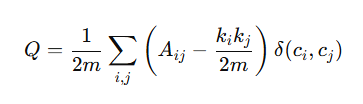
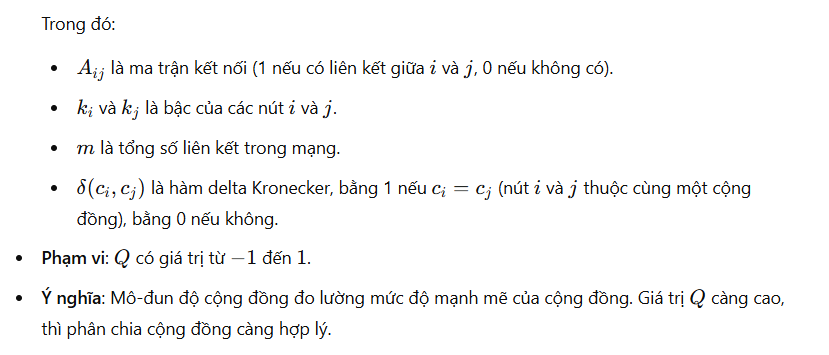

b) NMI (Normalized Mutual Information - Thông tin tương hỗ chuẩn hóa)
Công thức

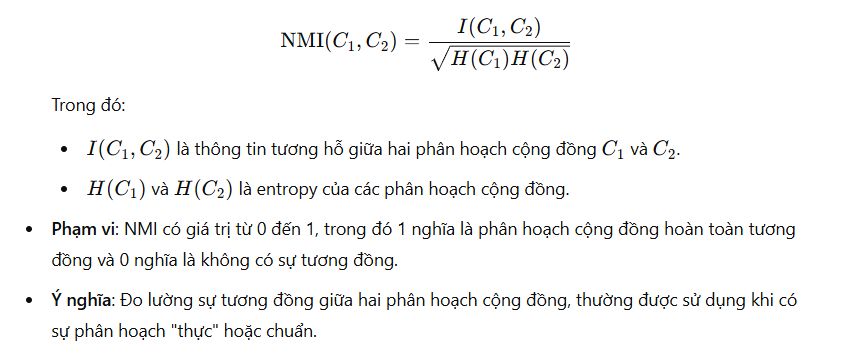

c) Conductance (Khả năng dẫn điện)
Công thức

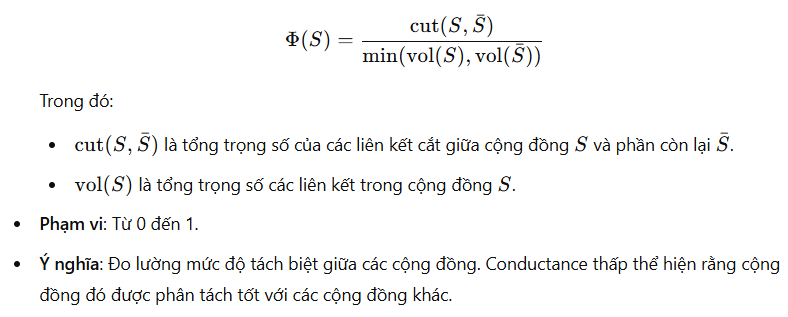

d) Cluster density (Mật độ cụm)

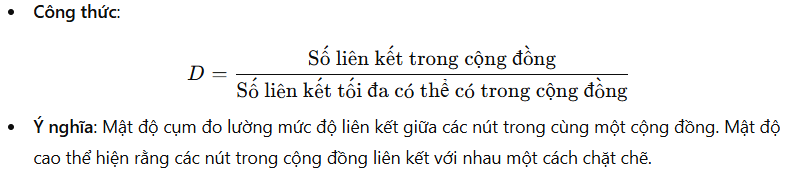

#Thực hiện phân tích phát hiện cộng đồng cho mạng xã hội tự chọn:

In [ ]:
!pip install python-louvain

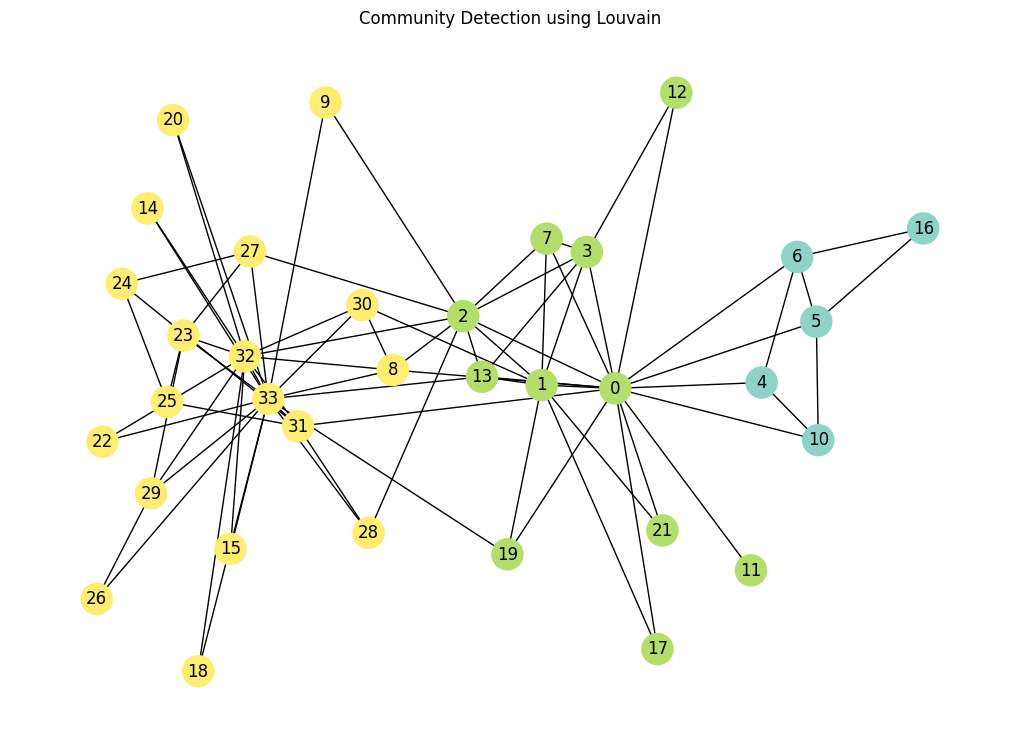

Modularity: 0.4345
NMI: 0.6912


In [ ]:
import networkx as nx
import community.community_louvain as community_louvain  # Import đúng module
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score

# Tạo mạng Karate Club
G = nx.karate_club_graph()

# Áp dụng thuật toán Louvain
partition = community_louvain.best_partition(G)

# Vẽ đồ thị với cộng đồng
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 7))
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=500, cmap=plt.cm.Set3)
plt.title("Community Detection using Louvain")
plt.show()

# Đánh giá Modularity
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity:.4f}")

# Đánh giá với Ground Truth
ground_truth = {node: 0 if G.nodes[node]["club"] == "Mr. Hi" else 1 for node in G.nodes()}
nmi = normalized_mutual_info_score(
    list(ground_truth.values()),
    list(partition.values())
)
print(f"NMI: {nmi:.4f}")
